In [1]:
import os
import pandas as pd
from pathlib import Path

In [2]:
data_input_dir = "../data/processed"
data_dir = Path('../data')
input_file = os.path.join(data_input_dir, "ep", "merged_with_ride_features.parquet")

splits_output_dir = "../data/processed/splits"
os.makedirs(splits_output_dir, exist_ok=True)

In [3]:
ep_df = pd.read_parquet(input_file)
print(ep_df.shape)
display(ep_df)

(14196903, 18)


,ride_name,timestamp,wait_time,closed,temperature,rain,is_german_holiday,is_swiss_holiday,is_french_holiday,feature_attraction_type,feature_category,feature_max_height,feature_track_length,feature_max_speed,feature_g_force,feature_min_age,feature_min_height,feature_capacity_per_hour
0,alpine express enzian,2017-05-23 09:00:00,1.0,False,17.4,0.0,False,False,False,Powered Coaster,family,6.0,430.0,35.0,1.5,4.0,95.0,900.0
1,poppy towers,2017-05-23 09:00:00,0.0,False,17.4,0.0,False,False,False,Children's Drop Tower,children,8.0,NaN,15.0,1.5,4.0,100.0,500.0
2,silver star,2017-05-23 09:00:00,0.0,False,17.4,0.0,False,False,False,Hyper Coaster,thrill,73.0,1620.0,127.0,4.0,8.0,140.0,1750.0
3,swiss bob run,2017-05-23 09:00:00,1.0,False,17.4,0.0,False,False,False,Bobsled Coaster,family,20.0,500.0,65.0,2.8,6.0,120.0,1200.0
4,tirol log flume,2017-05-23 09:00:00,1.0,False,17.4,0.0,False,False,False,Log Flume,water,22.0,600.0,50.0,2.0,4.0,100.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14196898,fjordrafting,2024-12-31 21:00:00,0.0,True,-1.0,0.0,False,False,False,River Rapids,water,8.0,450.0,20.0,1.5,4.0,110.0,1800.0
14196899,jim button journey through morrowland,2024-12-31 21:00:00,0.0,True,-1.0,0.0,False,False,False,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14196900,josefinas magical imperial journey,2024-12-31 21:00:00,0.0,True,-1.0,0.0,False,False,False,Dark Boat Ride,family,5.0,380.0,8.0,1.0,0.0,0.0,1200.0
14196901,madame freudenreich curiosits,2024-12-31 21:00:00,0.0,True,-1.0,0.0,False,False,False,Dark Ride,family,6.0,250.0,8.0,1.0,0.0,0.0,700.0


We found in the data exploration, that we have 3 consecutive outlier days which we'd like to remove.

In [4]:
ep_df = ep_df[~ep_df["timestamp"].dt.date.isin([pd.Timestamp('2020-05-30').date(), 
                                       pd.Timestamp('2020-05-31').date(), 
                                       pd.Timestamp('2020-06-01').date()])]
ep_df.shape

(14181678, 19)

We also remove the months January, February and march because there are nearly no wait times available due to the park being closed 

In [5]:
ep_df = ep_df[~ep_df["timestamp"].dt.month.isin([1, 2, 3])]
ep_df.shape

(10973810, 19)

In [6]:
ep_df["ride_name"].unique()

array(['alpine express enzian', 'poppy towers', 'silver star',
       'swiss bob run', 'tirol log flume', 'vienna wave swing  glckspilz',
       'voletarium', 'pegasus', 'volo da vinci',
       'whale adventures  northern lights', 'pirates in batavia',
       'snorri touren', 'voltron nevera powered by rimac',
       'bellevue ferris wheel', 'tnnevirvel', 'poseidon',
       'old mac donalds tractor fun', 'vindjammer',
       'madame freudenreich curiosits', 'matterhornblitz', 'arthur',
       'atlantica supersplash', 'atlantis adventure', 'baaa express',
       'blue fire megacoaster', 'castello dei medici', 'dancing dingie',
       'arena of football  be part of it', 'eurotower',
       'eurosat  cancan coaster', 'fjordrafting',
       'jim button  journey through morrowland',
       'josefinas magical imperial journey', 'kolumbusjolle', 'euromir'],
      dtype=object)

# Missing Values

In [7]:
print(ep_df["wait_time"].isna().sum())
print(ep_df["closed"].unique())
print("NaN wait_time count:", ep_df[ep_df["wait_time"].isna()].shape[0])
print("closed == False count:", ep_df[ep_df["closed"] == False].shape[0])
print("Combined condition count:", ep_df[ep_df["wait_time"].isna() & (ep_df["closed"] == False)].shape[0])
ep_df[ep_df["wait_time"].isna() & (ep_df["closed"] == False)]

1786133
[False  True]
NaN wait_time count: 1786133
closed == False count: 7353655
Combined condition count: 1786133


,ride_name,timestamp,wait_time,closed,temperature,rain,wind,is_german_holiday,is_swiss_holiday,is_french_holiday,feature_attraction_type,feature_category,feature_max_height,feature_track_length,feature_max_speed,feature_g_force,feature_min_age,feature_min_height,feature_capacity_per_hour
5,vienna wave swing glckspilz,2017-05-23 09:00:00,NaN,False,18.7,0.0,1.1,False,False,False,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,voletarium,2017-05-23 09:00:00,NaN,False,18.7,0.0,1.1,False,False,False,Flying Theater,family,16.0,NaN,25.0,1.5,0.0,0.0,1400.0
11,snorri touren,2017-05-23 09:00:00,NaN,False,18.7,0.0,1.1,False,False,False,Dark Ride,family,5.0,300.0,8.0,1.0,0.0,0.0,1000.0
12,voltron nevera powered by rimac,2017-05-23 09:00:00,NaN,False,18.7,0.0,1.1,False,False,False,Launched Coaster,thrill,32.0,1000.0,110.0,4.2,8.0,140.0,1500.0
13,bellevue ferris wheel,2017-05-23 09:00:00,NaN,False,18.7,0.0,1.1,False,False,False,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14195991,josefinas magical imperial journey,2024-12-31 18:50:00,NaN,False,-1.0,0.0,2.8,False,False,False,Dark Boat Ride,family,5.0,380.0,8.0,1.0,0.0,0.0,1200.0
14195992,castello dei medici,2024-12-31 18:50:00,NaN,False,-1.0,0.0,2.8,False,False,False,Dark Boat Ride,family,5.0,300.0,8.0,1.0,0.0,0.0,1000.0
14196009,tnnevirvel,2024-12-31 18:55:00,NaN,False,-1.0,0.0,2.8,False,False,False,Spinning Raft Ride,family,5.0,200.0,15.0,1.5,4.0,100.0,900.0
14196016,atlantica supersplash,2024-12-31 18:55:00,NaN,False,-1.0,0.0,2.8,False,False,False,Water Coaster,water,30.0,470.0,80.0,2.5,6.0,120.0,1150.0


In [8]:
wait_time_nan_count = ep_df[ep_df["wait_time"].isna() & (ep_df["closed"] == False)].shape[0]
print("Total wait_time NaN count:", wait_time_nan_count)

# Percentage of NaN values in wait_time
wait_time_nan_percentage = wait_time_nan_count / len(ep_df)
print("Total wait_time NaN percentage:", round(wait_time_nan_percentage * 100, 2), "%")

Total wait_time NaN count: 1786133
Total wait_time NaN percentage: 16.28 %


/tmp/ipykernel_1213/2939272703.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona_cleaned_df['year'] = corona_cleaned_df['timestamp'].dt.year


Year Distribution:
year
2017     866530
2018    1093376
2019    1024861
2020     592279
2021     670508
2022    1009542
2023    1008280
2024    1008796
Name: count, dtype: int64


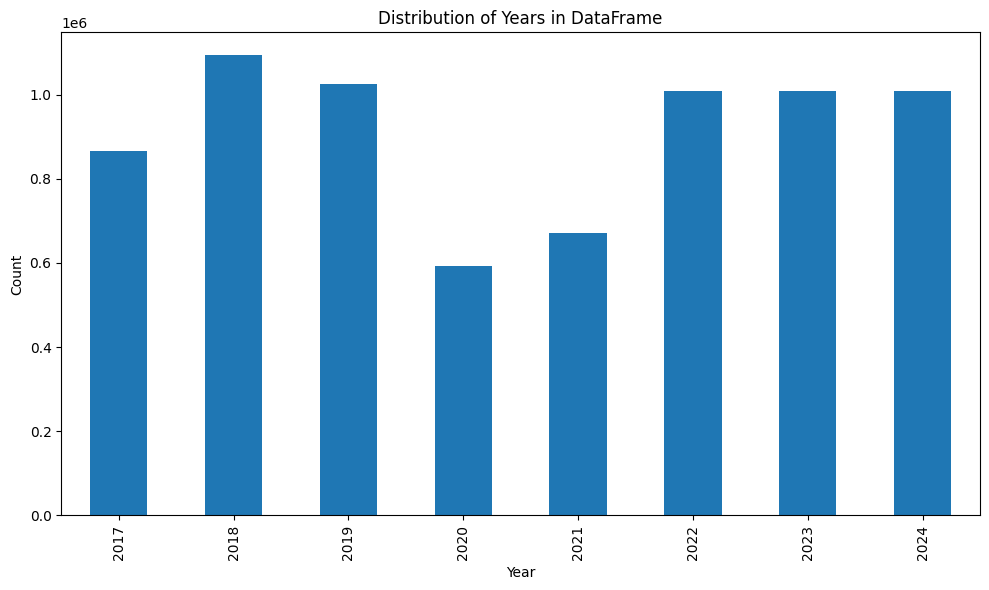

In [9]:
ep_df['timestamp'] = pd.to_datetime(ep_df['timestamp'])

open_df = ep_df[ep_df['closed'] == False]
corona_cleaned_df = open_df[(open_df['timestamp'] < '2020-12-01') | 
                            (open_df['timestamp'] > '2021-06-30')]

corona_cleaned_df['year'] = corona_cleaned_df['timestamp'].dt.year

year_distribution = corona_cleaned_df['year'].value_counts().sort_index()

print("Year Distribution:")
print(year_distribution)

# Optional: Visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
year_distribution.plot(kind='bar')
plt.title('Distribution of Years in DataFrame')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

max_missing_percentage = 20

ep_df['date'] = pd.to_datetime(ep_df['timestamp']).dt.date

ep_df['timestamp'] = pd.to_datetime(ep_df['timestamp'])

open_df = ep_df[ep_df['closed'] == False]

# cleaning for corona dates is not neccesary because park is closed true

day_stats = open_df.groupby(['ride_name', 'date']).agg(
    total_entries=('wait_time', 'count'),
    missing_entries=('wait_time', lambda x: x.isna().sum())
).reset_index()

day_stats['missing_percentage'] = (day_stats['missing_entries'] / day_stats['total_entries'] * 100).round(2)
day_stats['drop'] = day_stats['missing_percentage'] > max_missing_percentage

drop_summary = day_stats.groupby('ride_name').agg(
    days_to_drop=('drop', 'sum'),
    total_days=('drop', 'count')
).reset_index()

drop_summary['drop_percentage'] = (drop_summary['days_to_drop'] / drop_summary['total_days'] * 100).round(2)
drop_summary = drop_summary.sort_values('drop_percentage', ascending=False)

print(f"Summary of days to drop by ride (threshold: >{max_missing_percentage}% missing data):")
print("=============================================================")
for _, row in drop_summary.iterrows():
    print(f"{row['ride_name']:<30} | {row['days_to_drop']:<12} | {row['total_days']:<10} | {row['drop_percentage']}%")

total_days_to_drop = day_stats['drop'].sum()
total_days = len(day_stats)
drop_percentage = (total_days_to_drop / total_days * 100).round(2)
print(f"\nOverall: Would drop {total_days_to_drop} out of {total_days} ride-days ({drop_percentage}%)")


Summary of days to drop by ride (threshold: >20% missing data):
tnnevirvel                     | 1857         | 1862       | 99.73%
bellevue ferris wheel          | 1810         | 1862       | 97.21%
voltron nevera powered by rimac | 1644         | 1862       | 88.29%
snorri touren                  | 888          | 1862       | 47.69%
pirates in batavia             | 770          | 1862       | 41.35%
arena of football  be part of it | 699          | 1862       | 37.54%
tirol log flume                | 630          | 1862       | 33.83%
madame freudenreich curiosits  | 620          | 1862       | 33.3%
fjordrafting                   | 595          | 1862       | 31.95%
atlantica supersplash          | 594          | 1862       | 31.9%
alpine express enzian          | 517          | 1862       | 27.77%
eurosat  cancan coaster        | 473          | 1862       | 25.4%
poseidon                       | 444          | 1862       | 23.85%
castello dei medici            | 415          | 1862

## Bucket Handling Missing Data

In [13]:
from tqdm import tqdm
import pandas as pd
import gc

print("Preprocessing datetime features...")
ep_df['datetime'] = pd.to_datetime(ep_df['timestamp'])
ep_df['date'] = ep_df['datetime'].dt.date
ep_df['time_bucket'] = ep_df['datetime'].dt.floor('60min')
ep_df['day_of_week'] = ep_df['datetime'].dt.dayofweek

open_df = ep_df[~ep_df['closed']]

original_missing = open_df['wait_time'].isna().sum()
print(f"Original missing values: {original_missing}")

gc.collect()

def fill_missing_ride_values(ride_data):
    """Process a single ride's data to fill missing values"""
    filled_same_day = 0
    filled_prior_week = 0
    
    missing_mask = ride_data['wait_time'].isna() & ~ride_data['closed']
    missing_indices = ride_data.index[missing_mask]
    
    if len(missing_indices) == 0:
        return 0, 0
    
    grouped = ride_data.groupby(['date', 'time_bucket'])
    
    for idx in missing_indices:
        row = ride_data.loc[idx]
        date = row['date']
        bucket = row['time_bucket']
        current_time = row['datetime']

        try:
            bucket_data = grouped.get_group((date, bucket))

            valid_before = bucket_data[
                bucket_data['wait_time'].notna() & 
                ~bucket_data['closed'] &
                (bucket_data['datetime'] < current_time)
            ]
            
            if not valid_before.empty:
                ride_data.loc[idx, 'wait_time'] = valid_before['wait_time'].iloc[-1]
                filled_same_day += 1
                continue
        except KeyError:
            pass
            
        one_week_earlier = pd.Timestamp(date) - pd.Timedelta(days=7)
        bucket_time = bucket.time()
        
        try:
            prev_week_group_key = (one_week_earlier.date(), 
                                  pd.Timestamp.combine(one_week_earlier.date(), bucket_time))
            
            prev_week_data = grouped.get_group(prev_week_group_key)
            
            valid_prev_week = prev_week_data[
                prev_week_data['wait_time'].notna() & 
                ~prev_week_data['closed']
            ]
            
            if not valid_prev_week.empty:
                # Find closest time match
                current_minutes = current_time.hour * 60 + current_time.minute
                
                prev_times = valid_prev_week['datetime']
                prev_minutes = prev_times.dt.hour * 60 + prev_times.dt.minute
                time_diffs = abs(prev_minutes - current_minutes)
                
                best_idx = time_diffs.idxmin()
                ride_data.loc[idx, 'wait_time'] = valid_prev_week.loc[best_idx, 'wait_time']
                filled_prior_week += 1
                
        except KeyError:
            pass
    
    return filled_same_day, filled_prior_week

print("Processing rides...")
filled_from_same_day = 0
filled_from_prior_week = 0

unique_rides = ep_df['ride_name'].unique()
total_rides = len(unique_rides)

ep_df_copy = ep_df.copy()

for ride_idx, ride_name in enumerate(tqdm(unique_rides, desc="Processing rides")):
    print(f"Processing ride {ride_idx+1}/{total_rides}: {ride_name}")
    
    ride_df = ep_df_copy[ep_df_copy['ride_name'] == ride_name].copy()
    
    gc.collect()
    same_day, prior_week = fill_missing_ride_values(ride_df)
    
    ep_df.loc[ride_df.index, 'wait_time'] = ride_df['wait_time']
    
    filled_from_same_day += same_day
    filled_from_prior_week += prior_week
    
    filled_count = filled_from_same_day + filled_from_prior_week
    print(f"Progress: {filled_count} values filled so far ({filled_count/original_missing*100:.2f}% complete)")

filled_count = filled_from_same_day + filled_from_prior_week

print(f"Filled {filled_count} values out of {original_missing} missing values")
print(f"- {filled_from_same_day} filled from same-day data")
print(f"- {filled_from_prior_week} filled from one-week-prior data")

print("Calculating final statistics...")
day_stats_filled = ep_df.groupby(['ride_name', 'date']).agg(
    total_entries=('wait_time', 'count'),
    missing_entries=('wait_time', lambda x: x.isna().sum())
).reset_index()

day_stats_filled['missing_percentage'] = (day_stats_filled['missing_entries'] / day_stats_filled['total_entries'] * 100).round(2)
day_stats_filled['drop'] = day_stats_filled['missing_percentage'] > max_missing_percentage

drop_summary_filled = day_stats_filled.groupby('ride_name').agg(
    days_to_drop=('drop', 'sum'),
    total_days=('drop', 'count')
).reset_index()

drop_summary_filled['drop_percentage'] = (drop_summary_filled['days_to_drop'] / drop_summary_filled['total_days'] * 100).round(2)
drop_summary_filled = drop_summary_filled.sort_values('drop_percentage', ascending=False)

print(f"\nSummary of days to drop by ride after filling with 30-min buckets (threshold: >{max_missing_percentage}% missing data):")
print("=============================================================")
for _, row in drop_summary_filled.iterrows():
    print(f"{row['ride_name']:<30} | {row['days_to_drop']:<12} | {row['total_days']:<10} | {row['drop_percentage']}%")

total_days_to_drop_filled = day_stats_filled['drop'].sum()
total_days_filled = len(day_stats_filled)
drop_percentage_filled = (total_days_to_drop_filled / total_days_filled * 100).round(2)

print(f"\nOverall: Would drop {total_days_to_drop_filled} out of {total_days_filled} ride-days ({drop_percentage_filled}%)")
print(f"Original missing values: {original_missing} ({(original_missing/len(ep_df)*100):.2f}%)")
print(f"Values filled: {filled_count} ({(filled_count/len(ep_df)*100):.2f}%)")
print(f"Remaining missing values: {original_missing - filled_count} ({((original_missing - filled_count)/len(ep_df)*100):.2f}%)")

days_saved = total_days_to_drop - total_days_to_drop_filled
percent_reduction = (days_saved / total_days_to_drop * 100).round(2) if total_days_to_drop > 0 else 0
print(f"\nDays saved from dropping: {days_saved} ({percent_reduction}% reduction)")

Preprocessing datetime features...
Original missing values: 1786133
Processing rides...


Processing rides:   0%|          | 0/35 [00:00<?, ?it/s]

Processing ride 1/35: alpine express enzian


Processing rides:   3%|▎         | 1/35 [00:47<26:44, 47.18s/it]

Progress: 39698 values filled so far (2.22% complete)
Processing ride 2/35: poppy towers


Processing rides:   6%|▌         | 2/35 [01:14<19:29, 35.45s/it]

Progress: 62747 values filled so far (3.51% complete)
Processing ride 3/35: silver star


Processing rides:   9%|▊         | 3/35 [01:42<17:01, 31.93s/it]

Progress: 85978 values filled so far (4.81% complete)
Processing ride 4/35: swiss bob run


Processing rides:  11%|█▏        | 4/35 [02:10<15:40, 30.34s/it]

Progress: 110327 values filled so far (6.18% complete)
Processing ride 5/35: tirol log flume


Processing rides:  14%|█▍        | 5/35 [03:12<20:58, 41.94s/it]

Progress: 152975 values filled so far (8.56% complete)
Processing ride 6/35: vienna wave swing  glckspilz


Processing rides:  17%|█▋        | 6/35 [03:56<20:33, 42.54s/it]

Progress: 162359 values filled so far (9.09% complete)
Processing ride 7/35: voletarium


Processing rides:  20%|██        | 7/35 [04:41<20:16, 43.43s/it]

Progress: 170133 values filled so far (9.53% complete)
Processing ride 8/35: pegasus


Processing rides:  23%|██▎       | 8/35 [05:09<17:18, 38.48s/it]

Progress: 193137 values filled so far (10.81% complete)
Processing ride 9/35: volo da vinci


Processing rides:  26%|██▌       | 9/35 [05:37<15:17, 35.31s/it]

Progress: 216723 values filled so far (12.13% complete)
Processing ride 10/35: whale adventures  northern lights


Processing rides:  29%|██▊       | 10/35 [06:06<13:55, 33.43s/it]

Progress: 241367 values filled so far (13.51% complete)
Processing ride 11/35: pirates in batavia


Processing rides:  31%|███▏      | 11/35 [07:37<20:18, 50.79s/it]

Progress: 277503 values filled so far (15.54% complete)
Processing ride 12/35: snorri touren


Processing rides:  34%|███▍      | 12/35 [09:28<26:29, 69.10s/it]

Progress: 291629 values filled so far (16.33% complete)
Processing ride 13/35: voltron nevera powered by rimac


Processing rides:  37%|███▋      | 13/35 [13:02<41:29, 113.18s/it]

Progress: 293479 values filled so far (16.43% complete)
Processing ride 14/35: bellevue ferris wheel


Processing rides:  40%|████      | 14/35 [17:01<52:53, 151.12s/it]

Progress: 294871 values filled so far (16.51% complete)
Processing ride 15/35: tnnevirvel


Processing rides:  43%|████▎     | 15/35 [21:05<59:42, 179.13s/it]

Progress: 307759 values filled so far (17.23% complete)
Processing ride 16/35: poseidon


Processing rides:  46%|████▌     | 16/35 [21:45<43:26, 137.17s/it]

Progress: 332963 values filled so far (18.64% complete)
Processing ride 17/35: old mac donalds tractor fun


Processing rides:  49%|████▊     | 17/35 [22:12<31:12, 104.01s/it]

Progress: 356841 values filled so far (19.98% complete)
Processing ride 18/35: vindjammer


Processing rides:  51%|█████▏    | 18/35 [22:38<22:53, 80.77s/it] 

Progress: 380079 values filled so far (21.28% complete)
Processing ride 19/35: madame freudenreich curiosits


Processing rides:  54%|█████▍    | 19/35 [23:41<20:03, 75.23s/it]

Progress: 412896 values filled so far (23.12% complete)
Processing ride 20/35: matterhornblitz


Processing rides:  57%|█████▋    | 20/35 [24:08<15:10, 60.71s/it]

Progress: 436655 values filled so far (24.45% complete)
Processing ride 21/35: arthur


Processing rides:  60%|██████    | 21/35 [24:34<11:44, 50.34s/it]

Progress: 460098 values filled so far (25.76% complete)
Processing ride 22/35: atlantica supersplash


Processing rides:  63%|██████▎   | 22/35 [25:28<11:10, 51.55s/it]

Progress: 497365 values filled so far (27.85% complete)
Processing ride 23/35: atlantis adventure


Processing rides:  66%|██████▌   | 23/35 [25:54<08:44, 43.72s/it]

Progress: 519933 values filled so far (29.11% complete)
Processing ride 24/35: baaa express


Processing rides:  69%|██████▊   | 24/35 [26:20<07:03, 38.50s/it]

Progress: 543324 values filled so far (30.42% complete)
Processing ride 25/35: blue fire megacoaster


Processing rides:  71%|███████▏  | 25/35 [26:47<05:50, 35.09s/it]

Progress: 567798 values filled so far (31.79% complete)
Processing ride 26/35: castello dei medici


Processing rides:  74%|███████▍  | 26/35 [27:24<05:21, 35.67s/it]

Progress: 588218 values filled so far (32.93% complete)
Processing ride 27/35: dancing dingie


Processing rides:  77%|███████▋  | 27/35 [27:50<04:21, 32.66s/it]

Progress: 611161 values filled so far (34.22% complete)
Processing ride 28/35: arena of football  be part of it


Processing rides:  80%|████████  | 28/35 [28:54<04:54, 42.12s/it]

Progress: 659341 values filled so far (36.91% complete)
Processing ride 29/35: eurotower


Processing rides:  83%|████████▎ | 29/35 [29:19<03:42, 37.14s/it]

Progress: 682214 values filled so far (38.20% complete)
Processing ride 30/35: eurosat  cancan coaster


Processing rides:  86%|████████▌ | 30/35 [30:08<03:23, 40.70s/it]

Progress: 701380 values filled so far (39.27% complete)
Processing ride 31/35: fjordrafting


Processing rides:  89%|████████▊ | 31/35 [31:04<03:00, 45.21s/it]

Progress: 739619 values filled so far (41.41% complete)
Processing ride 32/35: jim button  journey through morrowland


Processing rides:  91%|█████████▏| 32/35 [31:48<02:14, 44.86s/it]

Progress: 752536 values filled so far (42.13% complete)
Processing ride 33/35: josefinas magical imperial journey


Processing rides:  94%|█████████▍| 33/35 [32:16<01:19, 39.86s/it]

Progress: 777499 values filled so far (43.53% complete)
Processing ride 34/35: kolumbusjolle


Processing rides:  97%|█████████▋| 34/35 [32:41<00:35, 35.31s/it]

Progress: 799645 values filled so far (44.77% complete)
Processing ride 35/35: euromir


Processing rides: 100%|██████████| 35/35 [33:08<00:00, 56.82s/it]

Progress: 823591 values filled so far (46.11% complete)
Filled 823591 values out of 1786133 missing values
- 782881 filled from same-day data
- 40710 filled from one-week-prior data
Calculating final statistics...



Summary of days to drop by ride after filling with 30-min buckets (threshold: >20% missing data):
bellevue ferris wheel          | 1790         | 2145       | 83.45%
tnnevirvel                     | 1732         | 2145       | 80.75%
voltron nevera powered by rimac | 1624         | 2145       | 75.71%
snorri touren                  | 686          | 2145       | 31.98%
pirates in batavia             | 404          | 2145       | 18.83%
vienna wave swing  glckspilz   | 258          | 2145       | 12.03%
voletarium                     | 256          | 2145       | 11.93%
jim button  journey through morrowland | 227          | 2145       | 10.58%
eurosat  cancan coaster        | 227          | 2145       | 10.58%
madame freudenreich curiosits  | 226          | 2145       | 10.54%
tirol log flume                | 136          | 2145       | 6.34%
castello dei medici            | 130          | 2145       | 6.06%
atlantica supersplash          | 124          | 2145       | 5.78%
fjordraftin

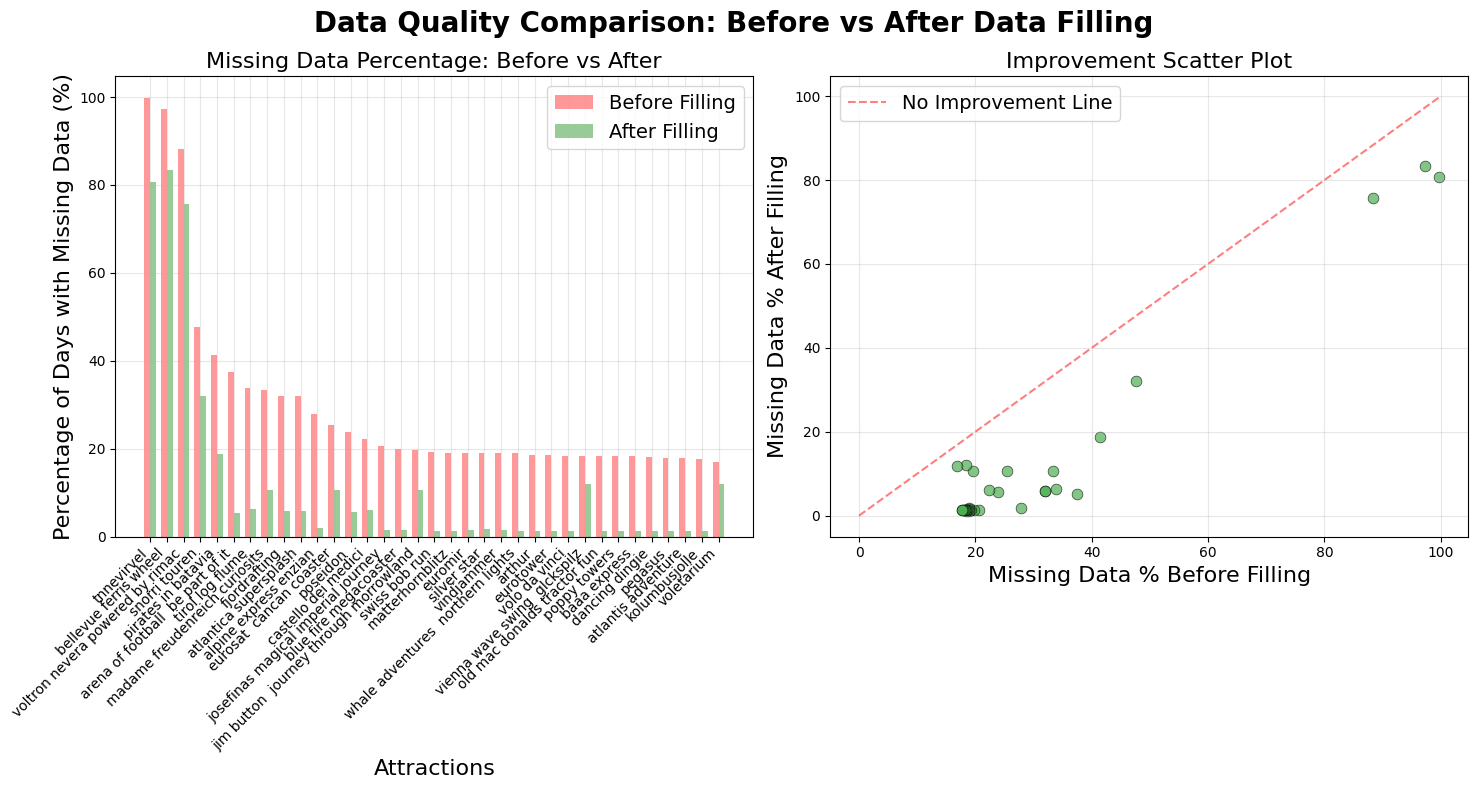

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data before filling
data_before = {
    'attraction': [
        'tnnevirvel', 'bellevue ferris wheel', 'voltron nevera powered by rimac',
        'snorri touren', 'pirates in batavia', 'arena of football  be part of it',
        'tirol log flume', 'madame freudenreich curiosits', 'fjordrafting',
        'atlantica supersplash', 'alpine express enzian', 'eurosat  cancan coaster',
        'poseidon', 'castello dei medici', 'josefinas magical imperial journey',
        'blue fire megacoaster', 'jim button  journey through morrowland',
        'swiss bob run', 'matterhornblitz', 'euromir', 'silver star',
        'vindjammer', 'whale adventures  northern lights', 'arthur',
        'eurotower', 'volo da vinci', 'vienna wave swing  glckspilz',
        'old mac donalds tractor fun', 'poppy towers', 'baaa express',
        'dancing dingie', 'pegasus', 'atlantis adventure', 'kolumbusjolle',
        'voletarium'
    ],
    'missing_days': [1857, 1810, 1644, 888, 770, 699, 630, 620, 595, 594, 517, 473, 444, 415, 383, 369, 365, 358, 356, 354, 353, 352, 352, 347, 345, 343, 343, 341, 340, 340, 337, 334, 331, 329, 315],
    'total_days': [1862] * 35,
    'percentage': [99.73, 97.21, 88.29, 47.69, 41.35, 37.54, 33.83, 33.3, 31.95, 31.9, 27.77, 25.4, 23.85, 22.29, 20.57, 19.82, 19.6, 19.23, 19.12, 19.01, 18.96, 18.9, 18.9, 18.64, 18.53, 18.42, 18.42, 18.31, 18.26, 18.26, 18.1, 17.94, 17.78, 17.67, 16.92]
}

# Data after filling
data_after = {
    'attraction': [
        'bellevue ferris wheel', 'tnnevirvel', 'voltron nevera powered by rimac',
        'snorri touren', 'pirates in batavia', 'vienna wave swing  glckspilz',
        'voletarium', 'jim button  journey through morrowland', 'eurosat  cancan coaster',
        'madame freudenreich curiosits', 'tirol log flume', 'castello dei medici',
        'atlantica supersplash', 'fjordrafting', 'poseidon', 'arena of football  be part of it',
        'alpine express enzian', 'silver star', 'vindjammer', 'euromir',
        'blue fire megacoaster', 'josefinas magical imperial journey', 'swiss bob run',
        'poppy towers', 'atlantis adventure', 'eurotower', 'arthur', 'matterhornblitz',
        'kolumbusjolle', 'baaa express', 'dancing dingie', 'pegasus',
        'old mac donalds tractor fun', 'volo da vinci', 'whale adventures  northern lights'
    ],
    'missing_days': [1790, 1732, 1624, 686, 404, 258, 256, 227, 227, 226, 136, 130, 124, 124, 122, 113, 41, 39, 34, 31, 30, 30, 29, 29, 29, 28, 27, 27, 27, 27, 27, 27, 27, 26, 26],
    'total_days': [2145] * 35,
    'percentage': [83.45, 80.75, 75.71, 31.98, 18.83, 12.03, 11.93, 10.58, 10.58, 10.54, 6.34, 6.06, 5.78, 5.78, 5.69, 5.27, 1.91, 1.82, 1.59, 1.45, 1.4, 1.4, 1.35, 1.35, 1.35, 1.31, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.26, 1.21, 1.21]
}

# Create DataFrames
df_before = pd.DataFrame(data_before)
df_after = pd.DataFrame(data_after)

# Merge dataframes on attraction name for comparison
df_merged = pd.merge(df_before, df_after, on='attraction', suffixes=('_before', '_after'))

# Set up the plotting style
plt.style.use('default')

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Data Quality Comparison: Before vs After Data Filling', fontsize=20, fontweight='bold')

# 1. Side-by-side bar chart comparison
ax1 = axes[0]
x_pos = np.arange(len(df_merged))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, df_merged['percentage_before'], width, 
                label='Before Filling', alpha=0.8, color='#ff7f7f')
bars2 = ax1.bar(x_pos + width/2, df_merged['percentage_after'], width,
                label='After Filling', alpha=0.8, color='#7fbf7f')

ax1.set_xlabel('Attractions', fontsize=16)
ax1.set_ylabel('Percentage of Days with Missing Data (%)', fontsize=16)
ax1.set_title('Missing Data Percentage: Before vs After', fontsize=16)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(df_merged['attraction'], rotation=45, ha='right', fontsize=10)
ax1.legend(fontsize=14)
ax1.grid(True, alpha=0.3)

# 2. Scatter plot showing improvement
ax2 = axes[1]
ax2.scatter(df_merged['percentage_before'], df_merged['percentage_after'], 
           alpha=0.7, s=60, color='#4CAF50', edgecolors='black', linewidth=0.5)

# Add diagonal line for reference (no improvement line)
max_val = max(df_merged['percentage_before'].max(), df_merged['percentage_after'].max())
ax2.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='No Improvement Line')

ax2.set_xlabel('Missing Data % Before Filling', fontsize=16)
ax2.set_ylabel('Missing Data % After Filling', fontsize=16)
ax2.set_title('Improvement Scatter Plot', fontsize=16)
ax2.legend(fontsize=14)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
# fig.savefig("data_filling_improvements.svg")

In [14]:

ep_df.to_parquet(data_dir / 'processed' / 'ep' / 'bucket_filled_NaN.parquet', index=False)


In [48]:
input_path = data_dir / 'processed' / 'ep' / 'bucket_filled_NaN.parquet'
control_df = pd.read_parquet(input_path)

In [49]:
total_records = control_df[control_df["closed"] == False].shape[0]
missing_wait_times = control_df[control_df["closed"] == False]['wait_time'].isna().sum()
missing_percentage = (missing_wait_times / total_records) * 100

print(f"Total records without closed: {total_records}")
print(f"Missing wait_times without closed: {missing_wait_times}")
print(f"Missing percentage without closed: {missing_percentage:.2f}%")

total_records = control_df.shape[0]
missing_wait_times = control_df['wait_time'].isna().sum()
missing_percentage = (missing_wait_times / total_records) * 100

print(f"Total records with closed: {total_records}")
print(f"Missing wait_times witht closed: {missing_wait_times}")
print(f"Missing percentage with closed: {missing_percentage:.2f}%")

print("Shape: " + str(ep_df.shape))

Total records without closed: 7353655
Missing wait_times without closed: 962542
Missing percentage without closed: 13.09%
Total records with closed: 10973810
Missing wait_times witht closed: 962542
Missing percentage with closed: 8.77%
Shape: (9091812, 23)


In [50]:
max_missing_percentage = 20

In [3]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import gc

def clean_wait_time_data(df, max_missing_percentage=20, rides_to_drop=None):
    """
    Optimized function to clean wait time data by removing:
    1. Records for specified rides to drop completely
    2. Records for days where a ride has more than max_missing_percentage% missing values
    
    Args:
        df: DataFrame with wait time data
        max_missing_percentage: Maximum allowed percentage of missing values per ride-day
        rides_to_drop: List of ride names to drop completely
        
    Returns:
        Cleaned DataFrame
    """
    print("Starting data cleaning process...")
    
    if rides_to_drop:
        print(f"Dropping {len(rides_to_drop)} rides completely...")
        before_count = len(df)
        result_df = df[~df['ride_name'].isin(rides_to_drop)].copy()
        after_count = len(result_df)
        print(f"Dropped {before_count - after_count} records ({(1 - after_count/before_count)*100:.2f}% of data)")
    else:
        result_df = df.copy()
    
    if 'date' not in result_df.columns:
        print("Converting timestamps to dates...")
        result_df['date'] = pd.to_datetime(result_df['timestamp']).dt.date
    
    print(f"Calculating missing percentages (threshold: {max_missing_percentage}%)...")
    
    open_df = result_df[result_df['closed'] == False]
    
    print("Grouping data to calculate missing percentages...")
    day_stats = open_df.groupby(['ride_name', 'date']).agg(
        total_entries=('wait_time', 'count'),
        missing_entries=('wait_time', lambda x: x.isna().sum())
    ).reset_index()
    
    day_stats['missing_percentage'] = (day_stats['missing_entries'] / day_stats['total_entries'] * 100).round(2)
    
    days_to_drop = day_stats[day_stats['missing_percentage'] > max_missing_percentage]
    print(f"Found {len(days_to_drop)} ride-days to drop due to excessive missing data")
    
    if len(days_to_drop) > 0:
        print("Creating filtering index...")
        drop_index = set(zip(days_to_drop['ride_name'], days_to_drop['date']))
        
        print("Filtering out days with excessive missing data...")
        before_count = len(result_df)
        
        print("Creating tuple columns for efficient filtering...")
        result_df['ride_date_tuple'] = list(zip(result_df['ride_name'], result_df['date']))
        result_df = result_df[~result_df['ride_date_tuple'].isin(drop_index)]
        result_df = result_df.drop(columns=['ride_date_tuple'])
        
        after_count = len(result_df)
        print(f"Dropped {before_count - after_count} records ({(1 - after_count/before_count)*100:.2f}% of data)")
    
    return result_df, day_stats

if __name__ == "__main__":
    gc.collect()
    data_dir = Path('../data')
    input_path = data_dir / 'processed' / 'ep' / 'bucket_filled_NaN.parquet'
    output_path = data_dir / 'processed' / 'ep' / 'clean_dropped_wait_times.parquet'
    
    print(f"Loading data from {input_path}...")
    ep_df = pd.read_parquet(input_path)
    print(f"Loaded {len(ep_df):,} records")
    
    rides_to_drop_completely = [
        'bellevue ferris wheel',
        'tnnevirvel',
        'snorri touren',
        'pirates in batavia'
    ]
    
    cleaned_df, day_stats = clean_wait_time_data(
        ep_df, 
        max_missing_percentage=20,
        rides_to_drop=rides_to_drop_completely
    )
    
    total_records = len(cleaned_df)
    missing_values = cleaned_df['wait_time'].isna().sum()
    missing_percentage = (missing_values / total_records) * 100
    
    print(f"\nMissing Values After Cleaning:")
    print(f"Total records in cleaned dataset: {total_records:,}")
    print(f"Records with missing wait_time values: {missing_values:,}")
    print(f"Percentage of missing values: {missing_percentage:.2f}%")
    
    open_records = cleaned_df[cleaned_df['closed'] == False]
    open_total = len(open_records)
    open_missing = open_records['wait_time'].isna().sum()
    open_missing_percentage = (open_missing / open_total) * 100
    
    print(f"\nMissing Values in Open Rides After Cleaning:")
    print(f"Total open ride records: {open_total:,}")
    print(f"Open records with missing wait_time values: {open_missing:,}")
    print(f"Percentage of missing values in open records: {open_missing_percentage:.2f}%")
    
    print(f"\nSaving cleaned data to {output_path}...")
    cleaned_df.to_parquet(output_path, index=False)
    print(f"Saved {len(cleaned_df):,} records")
    
    total_reduction = (1 - len(cleaned_df)/len(ep_df)) * 100
    print(f"\nCleaning Summary:")
    print(f"Original records: {len(ep_df):,}")
    print(f"Cleaned records: {len(cleaned_df):,}")
    print(f"Reduction: {total_reduction:.2f}%")

Loading data from ../data/processed/ep/bucket_filled_NaN.parquet...
Loaded 10,973,810 records
Starting data cleaning process...
Dropping 4 rides completely...
Dropped 1246610 records (11.36% of data)
Calculating missing percentages (threshold: 20%)...
Grouping data to calculate missing percentages...
Found 4293 ride-days to drop due to excessive missing data
Creating filtering index...
Filtering out days with excessive missing data...
Creating tuple columns for efficient filtering...
Dropped 622496 records (6.40% of data)

Missing Values After Cleaning:
Total records in cleaned dataset: 9,104,704
Records with missing wait_time values: 12,884
Percentage of missing values: 0.14%

Missing Values in Open Rides After Cleaning:
Total open ride records: 6,040,084
Open records with missing wait_time values: 12,884
Percentage of missing values in open records: 0.21%

Saving cleaned data to ../data/processed/ep/clean_dropped_wait_times.parquet...
Saved 9,104,704 records

Cleaning Summary:
Origin

In [4]:
input_path = data_dir / 'processed' / 'ep' / 'clean_dropped_wait_times.parquet'
ep_df = pd.read_parquet(input_path)

## Round Waittimes

In [5]:
ep_df["wait_time"].unique()

array([  1.    ,   0.    ,   5.    ,  10.    ,  15.    ,  20.    ,
        25.    ,  30.    ,  35.    ,  13.    ,  40.    ,  50.    ,
        55.    ,  45.    ,  60.    ,  65.    ,  80.    ,  70.    ,
            nan,  85.    ,  75.    ,  90.    ,  16.    ,   4.    ,
         2.    ,  53.    ,   3.    ,  22.    ,   7.    , 355.    ,
        33.    ,   0.5   ,   7.5   ,  17.5   ,  91.    ,  47.5   ,
        12.5   ,  22.5   ,  27.5   ,  45.5   ,  37.5   ,  32.5   ,
        24.    ,  11.    ,  42.5   ,   6.    ,  32.    ,  29.    ,
        18.    ,  33.3333,  13.75  ,  41.25  ,   8.3333,  18.75  ,
        18.3333,  16.6667,   6.6667,  23.75  ,   3.6667,   4.2   ,
         8.75  ,   8.    ,  48.75  ,  49.1667,  51.25  ,  13.3333,
        36.6667,  26.6667,  21.25  ,  52.5   ,   6.25  ,  20.8333,
        16.25  ,  21.6667,  46.6667,  19.    ,  16.5   ,   5.5   ,
         2.5   ,   9.    ,  57.5   ,  23.    ,  62.5   ,  72.8   ,
        60.6667,  82.5   ,  72.5   ,  26.    ,  21.    ,  31. 

In [6]:
ep_df["wait_time"] = ep_df["wait_time"].apply(lambda x: round(x / 5) * 5 if not pd.isna(x) else x)

In [7]:
ep_df["wait_time"].unique()

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  50.,  55.,
        45.,  60.,  65.,  80.,  70.,  nan,  85.,  75.,  90., 355., 335.,
       225., 500., 455.])

## Remove Waittime outliers

In [8]:
ep_df[(ep_df["wait_time"] >= 100)]

,ride_name,timestamp,wait_time,closed,temperature,rain,wind,is_german_holiday,is_swiss_holiday,is_french_holiday,...,feature_track_length,feature_max_speed,feature_g_force,feature_min_age,feature_min_height,feature_capacity_per_hour,date,datetime,time_bucket,day_of_week
543354,arthur,2017-10-09 14:00:00,355.0,False,15.5,0.00,0.4,False,False,False,...,550.0,40.0,2.0,4.0,100.0,1200.0,2017-10-09,2017-10-09 14:00:00,2017-10-09 14:00:00,0
543381,arthur,2017-10-09 14:05:00,355.0,False,15.5,0.00,0.4,False,False,False,...,550.0,40.0,2.0,4.0,100.0,1200.0,2017-10-09,2017-10-09 14:05:00,2017-10-09 14:00:00,0
2397639,fjordrafting,2019-06-16 16:10:00,335.0,False,22.8,0.01,3.4,False,False,False,...,450.0,20.0,1.5,4.0,110.0,1800.0,2019-06-16,2019-06-16 16:10:00,2019-06-16 16:00:00,6
2654926,pegasus,2019-08-14 16:05:00,225.0,False,23.0,0.00,1.6,False,False,False,...,450.0,60.0,2.5,6.0,120.0,1100.0,2019-08-14,2019-08-14 16:05:00,2019-08-14 16:00:00,2
2853311,eurosat cancan coaster,2019-09-29 11:15:00,500.0,False,17.5,0.01,7.5,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-29,2019-09-29 11:15:00,2019-09-29 11:00:00,6
2910686,fjordrafting,2019-10-12 13:20:00,455.0,False,22.0,0.00,4.2,False,False,False,...,450.0,20.0,1.5,4.0,110.0,1800.0,2019-10-12,2019-10-12 13:20:00,2019-10-12 13:00:00,5
3504148,silver star,2020-05-29 17:05:00,335.0,False,21.2,0.01,5.2,False,False,False,...,1620.0,127.0,4.0,8.0,140.0,1750.0,2020-05-29,2020-05-29 17:05:00,2020-05-29 17:00:00,4
3504164,silver star,2020-05-29 17:10:00,335.0,False,21.2,0.01,5.2,False,False,False,...,1620.0,127.0,4.0,8.0,140.0,1750.0,2020-05-29,2020-05-29 17:10:00,2020-05-29 17:00:00,4


In [9]:
ep_df = ep_df[ep_df["wait_time"].isna() | (ep_df["wait_time"] <= 100)]

In [10]:
ep_df["wait_time"].unique()

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 50., 55., 45., 60.,
       65., 80., 70., nan, 85., 75., 90.])

# Remove remaining outliers

In [11]:
print(f"Rows before dropping: {len(ep_df)}")

ep_df = ep_df.dropna(subset=['wait_time'])

print(f"Remaining rows after dropping missing wait_time: {len(ep_df)}")

Rows before dropping: 9104696
Remaining rows after dropping missing wait_time: 9091812


In [12]:
ep_df["wait_time"].isna().sum()

np.int64(0)

# Filtering Out Problematic Days


In [13]:
def remove_closed_and_zero_wait_days(ride_data):
    """Remove days when the ride was fully closed or had no recorded wait times."""
    # Identify and remove fully closed days
    daily_closure_status = ride_data.groupby(ride_data["timestamp"].dt.date)["closed"].mean()
    fully_closed_days = daily_closure_status[daily_closure_status == 1].index
    
    print(f"Number of fully closed days: {len(fully_closed_days)}")
    print("Sample of fully closed days:", fully_closed_days[:10])
    
    ride_data = ride_data[~ride_data["timestamp"].dt.date.isin(fully_closed_days)]
    
    # Identify and remove days with zero wait times
    daily_wait_times = ride_data.groupby(ride_data["timestamp"].dt.date)["wait_time"].mean()
    zero_wait_days = daily_wait_times[daily_wait_times < 1].index
    
    print(f"Number of days with zero wait times: {len(zero_wait_days)}")
    print("Sample of zero wait time days:", zero_wait_days[:10])
    
    ride_data = ride_data[~ride_data["timestamp"].dt.date.isin(zero_wait_days)]
    
    return ride_data

In [14]:
ride_df = remove_closed_and_zero_wait_days(ep_df)
ride_df

Number of fully closed days: 283
Sample of fully closed days: Index([2017-09-10, 2017-10-14, 2017-11-06, 2017-11-07, 2017-11-08, 2017-11-09,
       2017-11-10, 2017-11-11, 2017-11-12, 2017-11-13],
      dtype='object', name='timestamp')
Number of days with zero wait times: 65
Sample of zero wait time days: Index([2017-09-14, 2017-09-19, 2017-11-27, 2017-11-28, 2017-11-29, 2017-11-30,
       2017-12-05, 2017-12-06, 2017-12-11, 2017-12-12],
      dtype='object', name='timestamp')


,ride_name,timestamp,wait_time,closed,temperature,rain,wind,is_german_holiday,is_swiss_holiday,is_french_holiday,...,feature_track_length,feature_max_speed,feature_g_force,feature_min_age,feature_min_height,feature_capacity_per_hour,date,datetime,time_bucket,day_of_week
0,alpine express enzian,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,...,430.0,35.0,1.5,4.0,95.0,900.0,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1
1,poppy towers,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,...,NaN,15.0,1.5,4.0,100.0,500.0,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1
2,silver star,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,...,1620.0,127.0,4.0,8.0,140.0,1750.0,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1
3,swiss bob run,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,...,500.0,65.0,2.8,6.0,120.0,1200.0,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1
4,tirol log flume,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,...,600.0,50.0,2.0,4.0,100.0,1400.0,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104699,eurotower,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN,False,False,False,...,NaN,5.0,1.0,0.0,0.0,700.0,2024-12-31,2024-12-31 21:00:00,2024-12-31 21:00:00,1
9104700,eurosat cancan coaster,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-31,2024-12-31 21:00:00,2024-12-31 21:00:00,1
9104701,jim button journey through morrowland,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-31,2024-12-31 21:00:00,2024-12-31 21:00:00,1
9104702,josefinas magical imperial journey,2024-12-31 21:00:00,0.0,True,NaN,NaN,NaN,False,False,False,...,380.0,8.0,1.0,0.0,0.0,1200.0,2024-12-31,2024-12-31 21:00:00,2024-12-31 21:00:00,1


# Operating Hours Detection

In [29]:
def filter_to_operating_hours(ride_data):
    """Keep only data during ride operating hours."""
    # Determine operating hours from data where wait times > 0
    operating_hours = ride_data[ride_data["wait_time"] > 0].groupby(
        ride_data["timestamp"].dt.date
    )["timestamp"].agg(['min', 'max']).reset_index()
    
    # Extract opening and closing hours
    operating_hours['opening_hour'] = pd.to_datetime(operating_hours['min']).dt.hour
    operating_hours['closing_hour'] = pd.to_datetime(operating_hours['max']).dt.hour
    
    # Set reasonable boundaries for operating hours
    operating_hours['opening_hour'] = operating_hours['opening_hour'].clip(lower=9, upper=11)
    operating_hours['closing_hour'] = operating_hours['closing_hour'].clip(lower=17, upper=21)
    
    # Create date-to-hours mapping
    date_to_hours = {}
    for _, row in operating_hours.iterrows():
        date_to_hours[row['timestamp']] = (row['opening_hour'], row['closing_hour'])
    
    # Filter data to operating hours only
    def is_operating_hour(timestamp):
        date = timestamp.date()
        assert date in date_to_hours, f"Date {date} not found in operating hours mapping."
        
        open_hour, close_hour = date_to_hours[date]
        hour = timestamp.hour
        return 1 if open_hour <= hour < close_hour else 0
    
    ride_data['operating_hour'] = ride_data['timestamp'].apply(is_operating_hour)
    ride_data = ride_data[ride_data['operating_hour'] == 1]
    ride_data = ride_data.drop(columns=["operating_hour"])
    
    return ride_data

In [30]:
cleaned_df = filter_to_operating_hours(ride_df)
cleaned_df

,ride_name,timestamp,wait_time,closed,temperature,rain,wind,is_german_holiday,is_swiss_holiday,is_french_holiday,...,feature_track_length,feature_max_speed,feature_g_force,feature_min_age,feature_min_height,feature_capacity_per_hour,date,datetime,time_bucket,day_of_week
0,alpine express enzian,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,...,430.0,35.0,1.5,4.0,95.0,900.0,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1
1,poppy towers,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,...,NaN,15.0,1.5,4.0,100.0,500.0,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1
2,silver star,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,...,1620.0,127.0,4.0,8.0,140.0,1750.0,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1
3,swiss bob run,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,...,500.0,65.0,2.8,6.0,120.0,1200.0,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1
4,tirol log flume,2017-05-23 09:00:00,0.0,False,18.7,0.0,1.1,False,False,False,...,600.0,50.0,2.0,4.0,100.0,1400.0,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103700,eurotower,2024-12-31 17:55:00,30.0,False,-0.2,0.0,1.6,False,False,False,...,NaN,5.0,1.0,0.0,0.0,700.0,2024-12-31,2024-12-31 17:55:00,2024-12-31 17:00:00,1
9103701,eurosat cancan coaster,2024-12-31 17:55:00,20.0,False,-0.2,0.0,1.6,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-31,2024-12-31 17:55:00,2024-12-31 17:00:00,1
9103702,jim button journey through morrowland,2024-12-31 17:55:00,5.0,False,-0.2,0.0,1.6,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-31,2024-12-31 17:55:00,2024-12-31 17:00:00,1
9103703,josefinas magical imperial journey,2024-12-31 17:55:00,0.0,False,-0.2,0.0,1.6,False,False,False,...,380.0,8.0,1.0,0.0,0.0,1200.0,2024-12-31,2024-12-31 17:55:00,2024-12-31 17:00:00,1


# Drop Feature Variables for now

In [31]:
cleaned_df.drop(['feature_attraction_type', 'feature_category', 'feature_max_height',
       'feature_track_length', 'feature_max_speed', 'feature_g_force',
       'feature_min_age', 'feature_min_height', 'feature_capacity_per_hour'],axis=1,inplace=True)

In [32]:
cleaned_df.drop(['wind'],axis=1,inplace=True)

In [33]:
cleaned_df.columns

Index(['ride_name', 'timestamp', 'wait_time', 'closed', 'temperature', 'rain',
       'is_german_holiday', 'is_swiss_holiday', 'is_french_holiday', 'date',
       'datetime', 'time_bucket', 'day_of_week'],
      dtype='object')

# Weather Data

In [34]:
data_input_dir = "../data/raw"
data_dir = Path('../data')
input_file = os.path.join(data_input_dir, "weather", "rust_weather_5min_rain_temperature.parquet")

rust_weather = pd.read_parquet(input_file)
rust_weather.drop("rain_mm", axis=1, inplace=True)
rust_weather.rename({"rain_mm_per_hour":"rain", "temperature_C": "temperature"}, axis=1, inplace=True)
print(rust_weather.shape)
display(rust_weather)

(877149, 3)


,timestamp,temperature,rain
0,2017-01-01 00:00:00,-3.400000,0.0
1,2017-01-01 00:05:00,-3.353064,0.0
2,2017-01-01 00:10:00,-3.319700,0.0
3,2017-01-01 00:15:00,-3.299307,0.0
4,2017-01-01 00:20:00,-3.291281,0.0
...,...,...,...
877144,2025-05-04 22:40:00,NaN,0.0
877145,2025-05-04 22:45:00,NaN,0.0
877146,2025-05-04 22:50:00,NaN,0.0
877147,2025-05-04 22:55:00,NaN,0.0


In [35]:
rust_weather["rain"].unique()

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.6,  1.2,  0.5,  0.9,  1. ,  0.8,
        1.1,  0.7,  2. ,  2.8,  1.7,  2.5,  1.4,  3.5,  2.6,  1.5,  3.1,
        1.9,  3. ,  7.3,  6. ,  1.3,  3.2,  2.7,  4.6,  1.8,  2.9,  2.4,
        2.3, 12.8,  3.6,  2.1,  1.6,  4.3,  2.2,  5.8,  3.7,  4. ,  4.1,
        3.4,  4.4,  5.3,  6.3,  5.7,  3.3,  9.4,  4.7,  4.5,  5.1,  5.9,
        3.8,  3.9, 15.4,  9.6,  7.1,  5.5,  4.9,  4.8,  4.2,  5. , 11.3,
        5.2,  8.6,  6.2,  8.2, 10.2,  7.6,  6.1,  5.4,  6.4, 10.7,  9. ,
       10.1,  8.5,  8.4,  7.4,  7.9,  8.1,  7.8, 10.5,  7. , 12.4])

In [36]:
def replace_weather_data(cleaned_df, rust_weather):
    """
    Replace temperature and rain values in cleaned_df with those from rust_weather.
    Optimized for performance using vectorized operations.
    
    Parameters:
    -----------
    cleaned_df : pandas.DataFrame
        DataFrame containing theme park ride data
    rust_weather : pandas.DataFrame
        DataFrame containing weather data in 5-minute intervals
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with updated weather data
    """
    print("Starting weather data replacement (optimized version)...")
    
    # Make a copy to avoid modifying the original
    updated_df = cleaned_df.copy()
    
    with tqdm(total=5, desc="Replacing weather data") as pbar:
        # Ensure timestamps are datetime objects
        updated_df['timestamp'] = pd.to_datetime(updated_df['timestamp'])
        rust_weather['timestamp'] = pd.to_datetime(rust_weather['timestamp'])
        pbar.update(1)
        
        # Use more efficient merge operation instead of row-by-row updating
        pbar.set_description("Preparing for merge operation")
        
        # First drop the current temperature and rain columns
        updated_df = updated_df.drop(['temperature', 'rain'], axis=1)
        pbar.update(1)
        
        # Create a focused weather DataFrame with just the columns we need
        weather_subset = rust_weather[['timestamp', 'temperature', 'rain']].copy()
        pbar.update(1)
        
        # Merge the DataFrames on timestamp
        pbar.set_description("Merging DataFrames")
        updated_df = pd.merge(
            updated_df,
            weather_subset,
            on='timestamp',
            how='left'
        )
        pbar.update(1)
        
        # Check if any weather data is missing after the merge
        pbar.set_description("Checking for missing data")
        missing_weather = updated_df[updated_df['temperature'].isna() | updated_df['rain'].isna()]
        if len(missing_weather) > 0:
            print(f"Warning: {len(missing_weather)} rows have missing weather data after merge")
            # Keep original weather data for these rows if available
            if 'temperature_x' in updated_df.columns and 'rain_x' in updated_df.columns:
                mask = updated_df['temperature'].isna()
                updated_df.loc[mask, 'temperature'] = updated_df.loc[mask, 'temperature_x']
                
                mask = updated_df['rain'].isna()
                updated_df.loc[mask, 'rain'] = updated_df.loc[mask, 'rain_x']
                
                # Drop the original columns
                updated_df = updated_df.drop(['temperature_x', 'rain_x'], axis=1)
        pbar.update(1)
    
    print("Weather data replacement complete!")
    return updated_df


def add_nonoperating_hours(cleaned_df, rust_weather):
    """
    Create new rows for all missing 5min slots outside of opening times (09:00-21:00).
    Optimized for high performance using vectorized operations.
    
    Parameters:
    -----------
    cleaned_df : pandas.DataFrame
        DataFrame containing theme park ride data with updated weather
    rust_weather : pandas.DataFrame
        DataFrame containing weather data in 5-minute intervals
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with additional rows for non-operating hours
    """
    print("Starting addition of non-operating hours (optimized version)...")
    
    cleaned_df['timestamp'] = pd.to_datetime(cleaned_df['timestamp'])
    rust_weather['timestamp'] = pd.to_datetime(rust_weather['timestamp'])
    
    cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
    
    cleaned_df['time_of_day'] = cleaned_df['timestamp'].dt.time
    operating_start = pd.to_datetime('09:00:00').time()
    operating_end = pd.to_datetime('21:00:00').time()
    
    print("Filtering weather data for non-operating hours...")
    rust_weather['time_of_day'] = rust_weather['timestamp'].dt.time
    rust_weather['date'] = rust_weather['timestamp'].dt.date
    
    morning_mask = rust_weather['time_of_day'] < operating_start
    evening_mask = rust_weather['time_of_day'] > operating_end
    non_operating_mask = morning_mask | evening_mask
    
    nonop_weather = rust_weather[non_operating_mask].copy()
    
    print(f"Found {len(nonop_weather)} weather records for non-operating hours")
    
    unique_dates = cleaned_df['date'].unique()
    print(f"Processing {len(unique_dates)} unique dates")
    
    print("Generating new rows efficiently...")
    
    all_new_rows = []
    
    for date in unique_dates:
        print(f"Processing date: {date}")
        
        date_weather = nonop_weather[nonop_weather['date'] == date.date()]
        
        if len(date_weather) == 0:
            print(f"  No weather data found for non-operating hours on {date}")
            continue
            

        rides_on_date_df = cleaned_df[cleaned_df['date'] == date]
        if len(rides_on_date_df) == 0:
            continue
            
        unique_rides = rides_on_date_df['ride_name'].unique()
        print(f"  Processing {len(unique_rides)} rides")
        
        for ride in unique_rides:
            ride_df = rides_on_date_df[rides_on_date_df['ride_name'] == ride]
            if len(ride_df) == 0:
                continue
                
            sample_row = ride_df.iloc[0]
            
            ride_template = pd.DataFrame({
                'timestamp': date_weather['timestamp'],
                'ride_name': ride
            })
            
            static_columns = [col for col in cleaned_df.columns 
                             if col not in ['timestamp', 'datetime', 'time_bucket', 'wait_time', 'temperature', 'rain', 'time_of_day']]
            
            for col in static_columns:
                ride_template[col] = sample_row[col]

            ride_template['datetime'] = ride_template['timestamp']
            ride_template['time_bucket'] = ride_template['timestamp']
            ride_template['wait_time'] = 0.0
            
            ride_template = pd.merge(
                ride_template,
                date_weather[['timestamp', 'temperature', 'rain']],
                on='timestamp',
                how='left'
            )
            

            all_new_rows.append(ride_template)

    if all_new_rows:
        print("Combining all new rows...")
        new_rows_df = pd.concat(all_new_rows, ignore_index=True)
        
        if 'time_of_day' in new_rows_df.columns:
            new_rows_df = new_rows_df.drop('time_of_day', axis=1)
        
        if 'time_of_day' in cleaned_df.columns:
            cleaned_df = cleaned_df.drop('time_of_day', axis=1)
        
        print("Merging with original data...")
        combined_df = pd.concat([cleaned_df, new_rows_df], ignore_index=True)
        
        print("Sorting data...")
        combined_df = combined_df.sort_values(['ride_name', 'timestamp'])
        
        print("Non-operating hours addition complete!")
        print(f"Original rows: {len(cleaned_df)}")
        print(f"New rows added: {len(new_rows_df)}")
        print(f"Total rows: {len(combined_df)}")
        
        return combined_df
    else:
        print("No new rows were created.")
        if 'time_of_day' in cleaned_df.columns:
            cleaned_df = cleaned_df.drop('time_of_day', axis=1)
        return cleaned_df


In [37]:
replaced_weather = replace_weather_data(cleaned_df, rust_weather)
replaced_weather

Starting weather data replacement (optimized version)...


Checking for missing data: 100%|██████████| 5/5 [00:00<00:00,  8.57it/s]    

Weather data replacement complete!


,ride_name,timestamp,wait_time,closed,is_german_holiday,is_swiss_holiday,is_french_holiday,date,datetime,time_bucket,day_of_week,temperature,rain
0,alpine express enzian,2017-05-23 09:00:00,0.0,False,False,False,False,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1,17.400000,0.0
1,poppy towers,2017-05-23 09:00:00,0.0,False,False,False,False,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1,17.400000,0.0
2,silver star,2017-05-23 09:00:00,0.0,False,False,False,False,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1,17.400000,0.0
3,swiss bob run,2017-05-23 09:00:00,0.0,False,False,False,False,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1,17.400000,0.0
4,tirol log flume,2017-05-23 09:00:00,0.0,False,False,False,False,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1,17.400000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371369,eurotower,2024-12-31 17:55:00,30.0,False,False,False,False,2024-12-31,2024-12-31 17:55:00,2024-12-31 17:00:00,1,0.681901,0.0
5371370,eurosat cancan coaster,2024-12-31 17:55:00,20.0,False,False,False,False,2024-12-31,2024-12-31 17:55:00,2024-12-31 17:00:00,1,0.681901,0.0
5371371,jim button journey through morrowland,2024-12-31 17:55:00,5.0,False,False,False,False,2024-12-31,2024-12-31 17:55:00,2024-12-31 17:00:00,1,0.681901,0.0
5371372,josefinas magical imperial journey,2024-12-31 17:55:00,0.0,False,False,False,False,2024-12-31,2024-12-31 17:55:00,2024-12-31 17:00:00,1,0.681901,0.0


In [3]:
output_path = data_dir / 'processed' / 'ep' / 'cleaned_with_new_weather.parquet'

In [39]:
replaced_weather.to_parquet(output_path, index=False)

In [4]:
replaced_weather = pd.read_parquet(output_path)

In [41]:
with_nonoperating = add_nonoperating_hours(replaced_weather, rust_weather)

Starting addition of non-operating hours (optimized version)...
Filtering weather data for non-operating hours...
Found 435479 weather records for non-operating hours
Processing 1767 unique dates
Generating new rows efficiently...
Processing date: 2017-05-23 00:00:00
  Processing 23 rides
Processing date: 2017-05-24 00:00:00
  Processing 24 rides
Processing date: 2017-05-25 00:00:00
  Processing 24 rides
Processing date: 2017-05-26 00:00:00
  Processing 26 rides
Processing date: 2017-05-27 00:00:00
  Processing 26 rides
Processing date: 2017-05-28 00:00:00
  Processing 26 rides
Processing date: 2017-05-29 00:00:00
  Processing 25 rides
Processing date: 2017-05-30 00:00:00
  Processing 25 rides
Processing date: 2017-05-31 00:00:00
  Processing 27 rides
Processing date: 2017-06-01 00:00:00
  Processing 26 rides
Processing date: 2017-06-02 00:00:00
  Processing 27 rides
Processing date: 2017-06-03 00:00:00
  Processing 26 rides
Processing date: 2017-06-04 00:00:00
  Processing 26 rides
Pr

In [42]:
print(with_nonoperating.shape)
with_nonoperating.drop_duplicates(subset=['ride_name', 'timestamp'], keep='first', inplace=True)
print(with_nonoperating.shape)

(12765959, 13)
(12682868, 13)


# Store files

In [43]:
bucket_df = cleaned_df[cleaned_df['timestamp'] == cleaned_df['time_bucket']]
print(f"Original dataframe shape: {cleaned_df.shape}")
print(f"Filtered dataframe shape: {bucket_df.shape}")


Original dataframe shape: (5371374, 13)
Filtered dataframe shape: (453081, 13)


In [44]:
bucket_with_operating = with_nonoperating[with_nonoperating['timestamp'] == with_nonoperating['time_bucket']]

In [45]:
output_path = data_dir / 'processed' / 'ep' / 'bucket_cleaned_wait_times.parquet'
bucket_df.to_parquet(output_path, index=False)

output_path = data_dir / 'processed' / 'ep' / 'cleaned_wait_times.parquet'
ep_df.to_parquet(output_path, index=False)

In [46]:
output_path = data_dir / 'processed' / 'ep' / 'bucket_cleaned_wait_times_with_nonoperating.parquet'
bucket_with_operating.to_parquet(output_path, index=False)

In [11]:
replaced_weather[replaced_weather["ride_name"] == "blue fire megacoaster"]

,ride_name,timestamp,wait_time,closed,is_german_holiday,is_swiss_holiday,is_french_holiday,date,datetime,time_bucket,day_of_week,temperature,rain
16,blue fire megacoaster,2017-05-23 09:00:00,5.0,False,False,False,False,2017-05-23,2017-05-23 09:00:00,2017-05-23 09:00:00,1,17.400000,0.0
37,blue fire megacoaster,2017-05-23 09:05:00,5.0,False,False,False,False,2017-05-23,2017-05-23 09:05:00,2017-05-23 09:00:00,1,17.611935,0.0
61,blue fire megacoaster,2017-05-23 09:10:00,0.0,False,False,False,False,2017-05-23,2017-05-23 09:10:00,2017-05-23 09:00:00,1,17.823217,0.0
84,blue fire megacoaster,2017-05-23 09:15:00,0.0,False,False,False,False,2017-05-23,2017-05-23 09:15:00,2017-05-23 09:00:00,1,18.033844,0.0
107,blue fire megacoaster,2017-05-23 09:20:00,5.0,False,False,False,False,2017-05-23,2017-05-23 09:20:00,2017-05-23 09:00:00,1,18.243817,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5356539,blue fire megacoaster,2024-12-31 17:35:00,15.0,False,False,False,False,2024-12-31,2024-12-31 17:35:00,2024-12-31 17:30:00,1,1.151007,0.0
5356565,blue fire megacoaster,2024-12-31 17:40:00,15.0,False,False,False,False,2024-12-31,2024-12-31 17:40:00,2024-12-31 17:30:00,1,1.015319,0.0
5356593,blue fire megacoaster,2024-12-31 17:45:00,15.0,False,False,False,False,2024-12-31,2024-12-31 17:45:00,2024-12-31 17:30:00,1,0.890968,0.0
5356620,blue fire megacoaster,2024-12-31 17:50:00,15.0,False,False,False,False,2024-12-31,2024-12-31 17:50:00,2024-12-31 17:30:00,1,0.779359,0.0


In [6]:
bucket_for_tcn = replaced_weather[replaced_weather['timestamp'] == replaced_weather['time_bucket']]

In [7]:
output_path = data_dir / 'processed' / 'ep' / 'bucket_for_tcn.parquet'
bucket_for_tcn.to_parquet(output_path, index=False)

In [8]:
output_path = data_dir / 'processed' / 'ep' / '5min_for_tcn.parquet'
replaced_weather.to_parquet(output_path, index=False)